<a href="https://colab.research.google.com/github/salmanromeo/CS_5783_Machine_Learning_Fall_2022/blob/main/CS_5783_Fall_2022_Assignment_3_Deep_learning/CS_5783_Fall_2022_Assignment_3_Deep_learning_Q1_Reg_Inv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

#####Design a convolutional neural network in Keras of at least 10 convolutional layers. Use the MNIST dataset for evaluation. You must try three designs as detailed below and provide your observations on the performance of each:
1.   A regular CNN where the number of filters in each layer increases as the depth of the 
network grows i.e., the Lth layer will have more filters than the (L-1)th layer.
2.   An inverted CNN where the number of filters in each layer decreases as the depth of the network grows i.e., the Lth layer will have less filters than the (L-1)th layer.
1.   An hour-glass shaped CNN where the number of filters will increase till the Lth layer and reduce afterwards.

#####Your goal is to design these networks and optimize them to their best performance by choosing the right hyperparameters for each network, such as the learning rate, batch size and the choice of optimizer (‘SGD’, ‘adam’, ‘RMSProp’). You must provide a detailed report of what values you tried for each hyperparameters, your observations on why the network performed well (or not) and the final accuracy for each network on the MNIST dataset.

#####You can refer to the Keras documentation for more details.

**Solution 1**

**Libraries**

In [1]:
from datetime import datetime
from packaging import version

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

**Loading Data**

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0 
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)

# Add an additional dimension to represent the single-channel
x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)
x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


**Plotting**

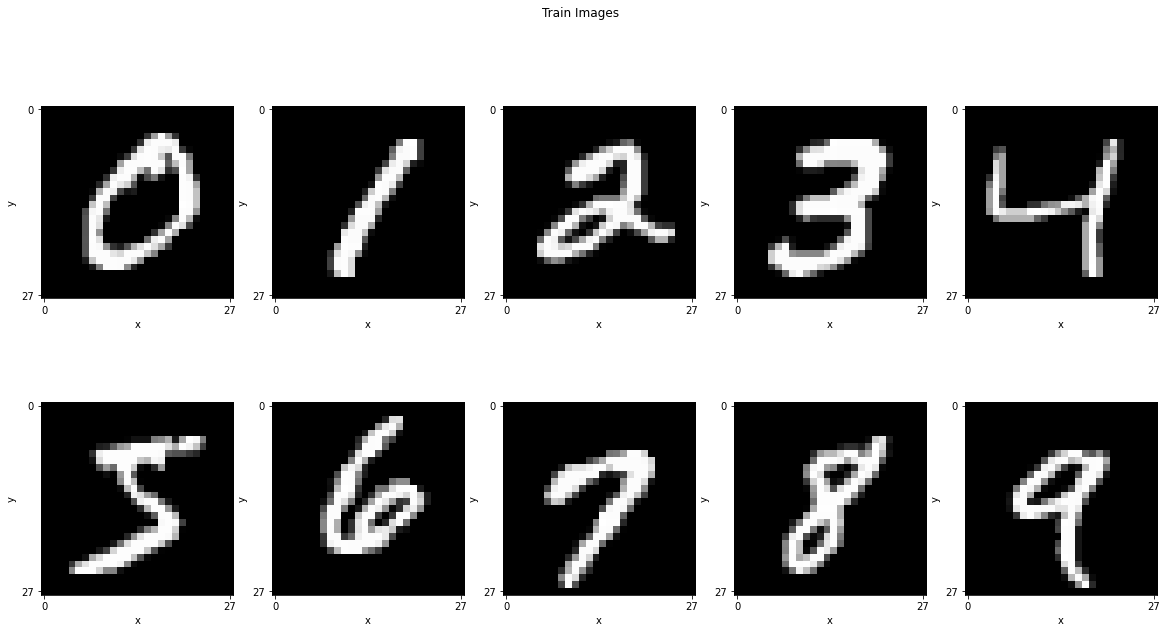

In [3]:
# Plotting
fig, ax = plt.subplots(2,5,figsize = (20, 10))
fig.suptitle('Train Images')
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(train_labels == i)[0]
    ax[i].set(xlabel='x', ylabel='y')
    plt.setp(ax, xticks=[0, 27], yticks=[0, 27])
    plottable_image = np.reshape(train_images[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray')

**1.1 Regular CNN**

In [4]:
cnn_model = tf.keras.models.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(512))
cnn_model.add(tf.keras.layers.Activation('relu'))
cnn_model.add(tf.keras.layers.Dense(10))
cnn_model.add(tf.keras.layers.Activation('softmax'))

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
cnn_model.build(input_shape=(1,28,28,1))
cnn_model.summary()

model_cnn = cnn_model
history_cnn = model_cnn.fit(x_train, train_labels, validation_split = 0.2, batch_size=512, epochs=25)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1, 28, 28, 16)           160       
                                                                 
 conv2d_1 (Conv2D)           (1, 14, 14, 16)           2320      
                                                                 
 max_pooling2d (MaxPooling2D  (1, 7, 7, 16)            0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (1, 7, 7, 32)             4640      
                                                                 
 conv2d_3 (Conv2D)           (1, 4, 4, 32)             9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (1, 2, 2, 32)            0         
 2D)                                                    

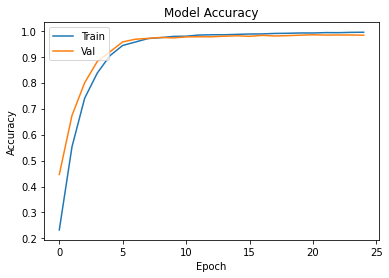

In [5]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [6]:
score = model_cnn.evaluate(x_train, train_labels)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0310 - accuracy: 0.9918
Train loss: 0.0310057420283556
Train accuracy: 0.9918000102043152


In [7]:
score = model_cnn.evaluate(x_test, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0650 - accuracy: 0.9849
Test loss: 0.06496333330869675
Test accuracy: 0.9848999977111816


**Effect of learning rate on Regular CNN**

To examine the effect of learning rate on the training process, we took different learning rate as $0.0001, 0.001, 0.01$

In [12]:
learningRate=[0.0001, 0.001, 0.01]
acc=np.zeros(3)
for i in range(len(learningRate)):
  cnn_model = tf.keras.models.Sequential()
  cnn_model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
  cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))

  cnn_model.add(tf.keras.layers.Flatten())
  cnn_model.add(tf.keras.layers.Dense(512))
  cnn_model.add(tf.keras.layers.Activation('relu'))
  cnn_model.add(tf.keras.layers.Dense(10))
  cnn_model.add(tf.keras.layers.Activation('softmax'))

  cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_model.build(input_shape=(1,28,28,1))
  accuracy= cnn_model.fit(train_images, train_labels, batch_size=512, epochs=25)
  acc[i]=accuracy.history['accuracy'][24]
  cnn_model.summary()

Epoch 1/25
118/118 [==============================] - 3s 17ms/step - loss: 1.9540 - accuracy: 0.2317
Epoch 2/25
118/118 [==============================] - 2s 16ms/step - loss: 0.9719 - accuracy: 0.6197
Epoch 3/25
118/118 [==============================] - 2s 17ms/step - loss: 0.4485 - accuracy: 0.8450
Epoch 4/25
118/118 [==============================] - 3s 22ms/step - loss: 0.2480 - accuracy: 0.9212
Epoch 5/25
118/118 [==============================] - 3s 21ms/step - loss: 0.1775 - accuracy: 0.9463
Epoch 6/25
118/118 [==============================] - 2s 17ms/step - loss: 0.1380 - accuracy: 0.9590
Epoch 7/25
118/118 [==============================] - 2s 16ms/step - loss: 0.1021 - accuracy: 0.9699
Epoch 8/25
118/118 [==============================] - 2s 16ms/step - loss: 0.0861 - accuracy: 0.9749
Epoch 9/25
118/118 [==============================] - 2s 18ms/step - loss: 0.0700 - accuracy: 0.9789
Epoch 10/25
118/118 [==============================] - 2s 16ms/step - loss: 0.0610 - accura

[0.99370003 0.99468333 0.99448335]


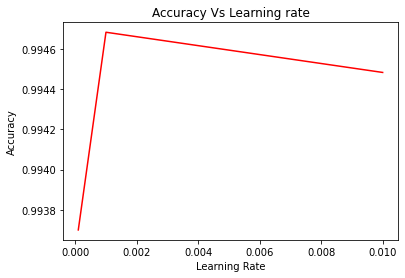

In [13]:
print(acc)
plt.plot(np.array(learningRate).reshape(3,1), np.array(acc).reshape(3,1), color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.title('Accuracy Vs Learning rate')
plt.show()

**Which one performed best**

In [16]:
from tabulate import tabulate
mydata = [[0.0001, 0.99370003],
          [0.001, 0.99468333],
          [0.01, 0.99448335]]
head = ["Learning Rate", "Accuarcy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+-----------------+------------+
|  Learning Rate  |  Accuarcy  |
+=================+============+
|     0.0001      |   0.9937   |
+-----------------+------------+
|      0.001      |  0.994683  |
+-----------------+------------+
|      0.01       |  0.994483  |
+-----------------+------------+


#####Based on the above results, we can say that for my case, learning rate = 0.001 gives highest accuarcy (0.99468333). This may be because of easily skipping of the minima for higher learning rates or unable to reach to minima due to high change in values. 

**Effect of batch size on Regular CNN**

To examine the effect of batch size on the training process, we took different batch size as $128, 256, 512$

In [18]:
batch=[128, 256, 512]
acc=np.zeros(3)
for i in range(len(batch)):
  cnn_model = tf.keras.models.Sequential()
  cnn_model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
  cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))

  cnn_model.add(tf.keras.layers.Flatten())
  cnn_model.add(tf.keras.layers.Dense(512))
  cnn_model.add(tf.keras.layers.Activation('relu'))
  cnn_model.add(tf.keras.layers.Dense(10))
  cnn_model.add(tf.keras.layers.Activation('softmax'))

  cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_model.build(input_shape=(1,28,28,1))
  accuracy= cnn_model.fit(train_images, train_labels, batch_size=batch[i], epochs=25)
  acc[i]=accuracy.history['accuracy'][24]
  cnn_model.summary()

Epoch 1/25
469/469 [==============================] - 6s 10ms/step - loss: 1.0624 - accuracy: 0.5938
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2724 - accuracy: 0.9198
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1443 - accuracy: 0.9613
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0998 - accuracy: 0.9731
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0775 - accuracy: 0.9793
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0678 - accuracy: 0.9824
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0519 - accuracy: 0.9864
Epoch 8/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0459 - accuracy: 0.9875
Epoch 9/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0406 - accuracy: 0.9891
Epoch 10/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0406 - accuracy: 0.989

[0.99601668 0.99536669 0.99453336]


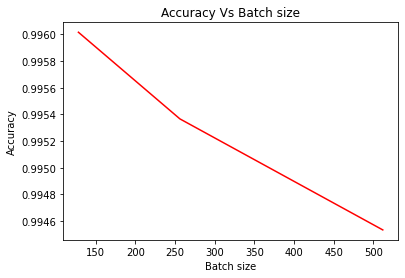

In [19]:
print(acc)
plt.plot(np.array(batch).reshape(3,1), np.array(acc).reshape(3,1), color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Batch size')
plt.title('Accuracy Vs Batch size')
plt.show()

**Which one performed best**

In [20]:
from tabulate import tabulate
mydata = [[128, 0.99601668],
          [256, 0.99536669],
          [512, 0.99453336]]
head = ["Batch Size", "Accuarcy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+--------------+------------+
|  Batch Size  |  Accuarcy  |
+==============+============+
|     128      |  0.996017  |
+--------------+------------+
|     256      |  0.995367  |
+--------------+------------+
|     512      |  0.994533  |
+--------------+------------+


Based on the above results, we can say that for my case, batch = 128 gives highest accuarcy (0.996017). Increasing batch size tends to worse results.

**Effect of optimizer on Regular CNN**

To examine the effect of optimizer on the training process, we took different optimizer as ‘SGD’, ‘adam’ and ‘RMSProp’ for fixed epoch 25 and learning rate 0.001 with various batch size.

In [21]:
batch=[128, 256, 512]
acc1=np.zeros(3)
acc2=np.zeros(3)
acc3=np.zeros(3)
for k in range(3):
  for i in range(len(batch)):    
        cnn_model = tf.keras.models.Sequential()
        cnn_model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
        cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))

        cnn_model.add(tf.keras.layers.Flatten())
        cnn_model.add(tf.keras.layers.Dense(512))
        cnn_model.add(tf.keras.layers.Activation('relu'))
        cnn_model.add(tf.keras.layers.Dense(10))
        cnn_model.add(tf.keras.layers.Activation('softmax'))

        if k==0:
          opt_lr = tf.keras.optimizers.Adam(learning_rate=0.001)
          cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model.build(input_shape=(1,28,28,1)) 
          accuracy1= cnn_model.fit(train_images, train_labels, batch_size=batch[i], epochs=25, verbose=0)
          acc1[i]=accuracy1.history['accuracy'][24]
        elif k==1:
          opt_lr = tf.keras.optimizers.SGD(learning_rate=0.001)
          cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model.build(input_shape=(1,28,28,1))
          accuracy2= cnn_model.fit(train_images, train_labels, batch_size=batch[i], epochs=25, verbose=0)
          acc2[i]=accuracy2.history['accuracy'][24]
        else:
          opt_lr = tf.keras.optimizers.RMSprop(learning_rate=0.001)
          cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model.build(input_shape=(1,28,28,1))
          accuracy3= cnn_model.fit(train_images, train_labels, batch_size=batch[i], epochs=25, verbose=0)
          acc3[i]=accuracy3.history['accuracy'][24]

[0.99564999 0.99603331 0.9957    ]
[0.11236667 0.11236667 0.11236667]
[0.99331665 0.99585003 0.99633336]


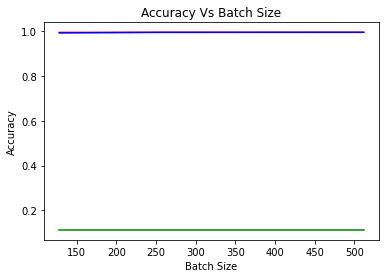

In [23]:
print(acc1)
print(acc2)
print(acc3)
plt.plot(np.array(batch).reshape(3,1), np.array(acc1).reshape(3,1), color = 'red', label='Adam')
plt.plot(np.array(batch).reshape(3,1), np.array(acc2).reshape(3,1), color = 'green', label='SGD')
plt.plot(np.array(batch).reshape(3,1), np.array(acc3).reshape(3,1), color = 'blue', label='RMSprop')
plt.ylabel('Accuracy')
plt.xlabel('Batch Size')
plt.title('Accuracy Vs Batch Size')
plt.show()

**Which one performed best**

In [25]:
from tabulate import tabulate
mydata = [[128, 0.99564999, 0.11236667, 0.99331665],
          [256, 0.99603331, 0.11236667, 0.99585003],
          [512, 0.9957, 0.11236667, 0.99633336]]
head = ["Batch Size", "Adam Accuracy", "SGD Accuracy", "RMSprop Accuracy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+--------------+-----------------+----------------+--------------------+
|  Batch Size  |  Adam Accuracy  |  SGD Accuracy  |  RMSprop Accuracy  |
+==============+=================+================+====================+
|     128      |     0.99565     |    0.112367    |      0.993317      |
+--------------+-----------------+----------------+--------------------+
|     256      |    0.996033     |    0.112367    |      0.99585       |
+--------------+-----------------+----------------+--------------------+
|     512      |     0.9957      |    0.112367    |      0.996333      |
+--------------+-----------------+----------------+--------------------+


#####Based on the graphs, with fixed epoch 25 and learning rate 0.001, RMSProp optimizer with batch size of 512 achieved the best result (0.996333). The Adam optimizer with batch size 256 leds to very close accuracy (0.996033) to RMSProp optimizer. However, SGD performed very poor with the current setup.

**1.2  Inverted CNN**

In [27]:
x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)

cnn_model_i = tf.keras.models.Sequential()
cnn_model_i.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_i.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_i.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_i.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model_i.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_i.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model_i.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model_i.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model_i.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model_i.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_i.add(tf.keras.layers.Flatten())
cnn_model_i.add(tf.keras.layers.Dense(512))
cnn_model_i.add(tf.keras.layers.Activation('relu'))
cnn_model_i.add(tf.keras.layers.Dense(10))
cnn_model_i.add(tf.keras.layers.Activation('softmax'))

cnn_model_i.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
cnn_model_i.build(input_shape=(1,28,28,1))
cnn_model_i.summary()

model_cnn_i = cnn_model_i
history_cnn_i = model_cnn_i.fit(x_train, train_labels, validation_split = 0.2, batch_size=512, epochs=25)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_310 (Conv2D)         (1, 28, 28, 256)          2560      
                                                                 
 conv2d_311 (Conv2D)         (1, 14, 14, 256)          590080    
                                                                 
 max_pooling2d_155 (MaxPooli  (1, 7, 7, 256)           0         
 ng2D)                                                           
                                                                 
 conv2d_312 (Conv2D)         (1, 7, 7, 128)            295040    
                                                                 
 conv2d_313 (Conv2D)         (1, 4, 4, 128)            147584    
                                                                 
 max_pooling2d_156 (MaxPooli  (1, 2, 2, 128)           0         
 ng2D)                                               

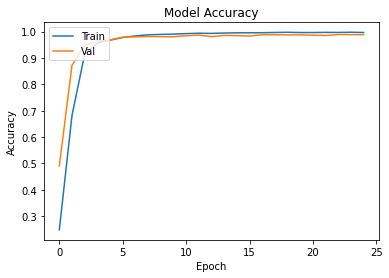

In [28]:
plt.plot(history_cnn_i.history['accuracy'])
plt.plot(history_cnn_i.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [29]:
score_i = model_cnn_i.evaluate(x_train, train_labels)
print('Train loss:', score_i[0])
print('Train accuracy:', score_i[1])

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0145 - accuracy: 0.9967
Train loss: 0.014482562430202961
Train accuracy: 0.996666669845581


In [30]:
score_i = model_cnn_i.evaluate(x_test, test_labels)
print('Test loss:', score_i[0])
print('Test accuracy:', score_i[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0452 - accuracy: 0.9888
Test loss: 0.04515833407640457
Test accuracy: 0.9887999892234802


**Effect of learning rate on Inverted CNN**

In [31]:
learningRate=[0.0001, 0.001, 0.01]
acc=np.zeros(3)
for i in range(len(learningRate)):
  cnn_model_i = tf.keras.models.Sequential()
  cnn_model_i.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
  cnn_model_i.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_i.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_i.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_i.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_i.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))

  cnn_model_i.add(tf.keras.layers.Flatten())
  cnn_model_i.add(tf.keras.layers.Dense(512))
  cnn_model_i.add(tf.keras.layers.Activation('relu'))
  cnn_model_i.add(tf.keras.layers.Dense(10))
  cnn_model_i.add(tf.keras.layers.Activation('softmax'))

  cnn_model_i.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_model_i.build(input_shape=(1,28,28,1))
  accuracy= cnn_model_i.fit(train_images, train_labels, batch_size=512, epochs=25)
  acc[i]=accuracy.history['accuracy'][24]
  cnn_model_i.summary()

Epoch 1/25
118/118 [==============================] - 23s 183ms/step - loss: 1.7606 - accuracy: 0.3045
Epoch 2/25
118/118 [==============================] - 21s 180ms/step - loss: 0.4895 - accuracy: 0.8303
Epoch 3/25
118/118 [==============================] - 21s 177ms/step - loss: 0.1634 - accuracy: 0.9515
Epoch 4/25
118/118 [==============================] - 21s 179ms/step - loss: 0.0936 - accuracy: 0.9727
Epoch 5/25
118/118 [==============================] - 21s 178ms/step - loss: 0.0636 - accuracy: 0.9811
Epoch 6/25
118/118 [==============================] - 21s 178ms/step - loss: 0.0516 - accuracy: 0.9846
Epoch 7/25
118/118 [==============================] - 21s 177ms/step - loss: 0.0392 - accuracy: 0.9885
Epoch 8/25
118/118 [==============================] - 21s 177ms/step - loss: 0.0372 - accuracy: 0.9885
Epoch 9/25
118/118 [==============================] - 21s 176ms/step - loss: 0.0304 - accuracy: 0.9906
Epoch 10/25
118/118 [==============================] - 21s 176ms/step - l

[0.99765003 0.99734998 0.99686664]


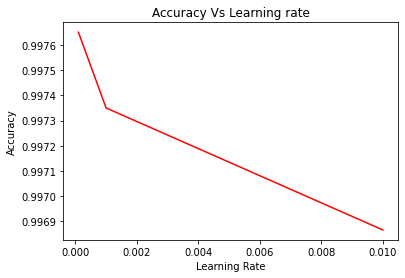

In [32]:
print(acc)
plt.plot(np.array(learningRate).reshape(3,1), np.array(acc).reshape(3,1), color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.title('Accuracy Vs Learning rate')
plt.show()

**Which one performed best**

In [33]:
from tabulate import tabulate
mydata = [[0.0001, 0.99765003],
          [0.001, 0.99734998],
          [0.01, 0.99686664]]
head = ["Learning Rate", "Accuarcy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+-----------------+------------+
|  Learning Rate  |  Accuarcy  |
+=================+============+
|     0.0001      |  0.99765   |
+-----------------+------------+
|      0.001      |  0.99735   |
+-----------------+------------+
|      0.01       |  0.996867  |
+-----------------+------------+


#####Based on the above results, we can say that for my case, learning rate = 0.0001 gives highest accuarcy (0.99765). As the learning rate increases accuracy decreases for inverted CNN.

**Effect of batch size on Inverted CNN**

In [34]:
batch=[128, 256, 512]
acc=np.zeros(3)
for i in range(len(batch)):
  cnn_model_i = tf.keras.models.Sequential()
  cnn_model_i.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
  cnn_model_i.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_i.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_i.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_i.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
  cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_i.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))

  cnn_model_i.add(tf.keras.layers.Flatten())
  cnn_model_i.add(tf.keras.layers.Dense(512))
  cnn_model_i.add(tf.keras.layers.Activation('relu'))
  cnn_model_i.add(tf.keras.layers.Dense(10))
  cnn_model_i.add(tf.keras.layers.Activation('softmax'))

  cnn_model_i.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_model_i.build(input_shape=(1,28,28,1))
  accuracy= cnn_model_i.fit(train_images, train_labels, batch_size=batch[i], epochs=25)
  acc[i]=accuracy.history['accuracy'][24]
  cnn_model_i.summary()

Epoch 1/25
469/469 [==============================] - 22s 43ms/step - loss: 0.7952 - accuracy: 0.7082
Epoch 2/25
469/469 [==============================] - 21s 44ms/step - loss: 0.1036 - accuracy: 0.9714
Epoch 3/25
469/469 [==============================] - 21s 44ms/step - loss: 0.0658 - accuracy: 0.9818
Epoch 4/25
469/469 [==============================] - 20s 43ms/step - loss: 0.0477 - accuracy: 0.9865
Epoch 5/25
469/469 [==============================] - 20s 43ms/step - loss: 0.0381 - accuracy: 0.9896
Epoch 6/25
469/469 [==============================] - 20s 44ms/step - loss: 0.0318 - accuracy: 0.9912
Epoch 7/25
469/469 [==============================] - 20s 43ms/step - loss: 0.0300 - accuracy: 0.9916
Epoch 8/25
469/469 [==============================] - 20s 43ms/step - loss: 0.0229 - accuracy: 0.9940
Epoch 9/25
469/469 [==============================] - 20s 43ms/step - loss: 0.0203 - accuracy: 0.9945
Epoch 10/25
469/469 [==============================] - 20s 43ms/step - loss: 0.016

[0.99828333 0.99783331 0.99814999]


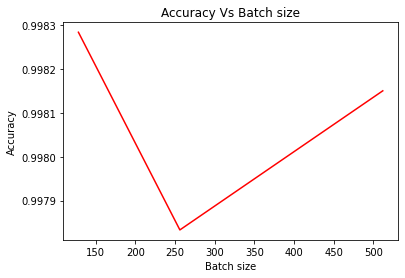

In [35]:
print(acc)
plt.plot(np.array(batch).reshape(3,1), np.array(acc).reshape(3,1), color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Batch size')
plt.title('Accuracy Vs Batch size')
plt.show()

**Which one performed best**

In [36]:
from tabulate import tabulate
mydata = [[128, 0.99828333],
          [256, 0.99783331],
          [512, 0.99814999]]
head = ["Batch Size", "Accuarcy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+--------------+------------+
|  Batch Size  |  Accuarcy  |
+==============+============+
|     128      |  0.998283  |
+--------------+------------+
|     256      |  0.997833  |
+--------------+------------+
|     512      |  0.99815   |
+--------------+------------+


#####Based on the above results, we can say that for my case, batch = 128 gives highest accuarcy (0.998283). While the accuracy dropped for batch size 256 but 512 gives good result.

**Effect of optimizer on Inverted CNN**

Due to the best performance in Regular CNN, we took batch size 512

In [42]:
batch=[512]
acc1=np.zeros(1)
acc2=np.zeros(1)
acc2=np.zeros(1)
for k in range(3):
  for i in range(len(batch)):    
        cnn_model_i = tf.keras.models.Sequential()
        cnn_model_i.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
        cnn_model_i.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
        cnn_model_i.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
        cnn_model_i.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model_i.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
        cnn_model_i.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model_i.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
        cnn_model_i.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model_i.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
        cnn_model_i.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model_i.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))

        cnn_model_i.add(tf.keras.layers.Flatten())
        cnn_model_i.add(tf.keras.layers.Dense(512))
        cnn_model_i.add(tf.keras.layers.Activation('relu'))
        cnn_model_i.add(tf.keras.layers.Dense(10))
        cnn_model_i.add(tf.keras.layers.Activation('softmax'))

        if k==0:
          opt_lr = tf.keras.optimizers.Adam(learning_rate=0.001)
          cnn_model_i.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model_i.build(input_shape=(1,28,28,1)) 
          accuracy1= cnn_model_i.fit(train_images, train_labels, batch_size=batch[i], epochs=25, verbose=0)
          acc1[i]=accuracy1.history['accuracy'][24]
        elif k==1:
          opt_lr = tf.keras.optimizers.SGD(learning_rate=0.001)
          cnn_model_i.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model_i.build(input_shape=(1,28,28,1))
          accuracy2= cnn_model_i.fit(train_images, train_labels, batch_size=batch[i], epochs=25, verbose=0)
          acc2[i]=accuracy2.history['accuracy'][24]
        else:
          opt_lr = tf.keras.optimizers.RMSprop(learning_rate=0.001)
          cnn_model_i.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model_i.build(input_shape=(1,28,28,1))
          accuracy2= cnn_model_i.fit(train_images, train_labels, batch_size=batch[i], epochs=25, verbose=0)
          acc2[i]=accuracy2.history['accuracy'][24]

In [44]:
print(acc1)
print(acc2)

[0.99736667]
[0.99855]
